## PATHRISE DATA CHALLENGE 
### By Vishnu Prasanth Redy Patur

In [1786]:
import pandas as pd
import math
import autocomplete
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore') 

In [1787]:
data=pd.read_excel('data_Pathrise.xlsx')
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 2544
Number of columns: 16


In [1788]:
#Dropping ID column
data.drop('id',axis=1,inplace=True) 
#missing Values
missing=pd.DataFrame(data.isnull().sum())
missing=missing.loc[missing[0]>0]
missing.columns=['missing_value_count']
missing['missing__value_percentage']=round((missing.iloc[:,0]/data.shape[0])*100,2).astype(str)+'%'
missing.sort_values(by=['missing_value_count'], ascending=False)

,missing_value_count,missing__value_percentage
program_duration_days,616,24.21%
gender,492,19.34%
work_authorization_status,284,11.16%
employment_status,229,9.0%
professional_experience,222,8.73%
number_of_interviews,218,8.57%
length_of_job_search,74,2.91%
highest_level_of_education,58,2.28%
biggest_challenge_in_search,24,0.94%
race,18,0.71%


In [1789]:
#capturing Numeical and Caterical attributes
numerical=['program_duration_days','number_of_interviews','number_of_applications']
categorical=[i for i in  data.columns if i not in numerical]

## Data Exploration

### Categorical

In [1790]:
#Pathrise Status
EDA=data.copy()
EDA['pathrise_status'].value_counts(dropna=False)

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

In [1791]:
#primary Track
EDA['primary_track'].value_counts(dropna=False)

SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: primary_track, dtype: int64

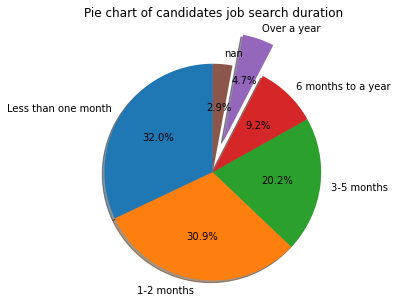

<Figure size 1440x432 with 0 Axes>

In [1792]:
# Pie chart of Jobsearch LEngth

length_job=pd.DataFrame(EDA.length_of_job_search.value_counts(dropna=False))
labels = list(length_job.index)
sizes =list((length_job.length_of_job_search/length_job.length_of_job_search.sum())*100)
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0,0.3,0)  
fig1, ax1 = plt.subplots()
plt.title('Pie chart of candidates job search duration')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.figure(figsize=(20,6))
plt.show()

only 4.7% of the candidates have been searching for jobs for more than a year

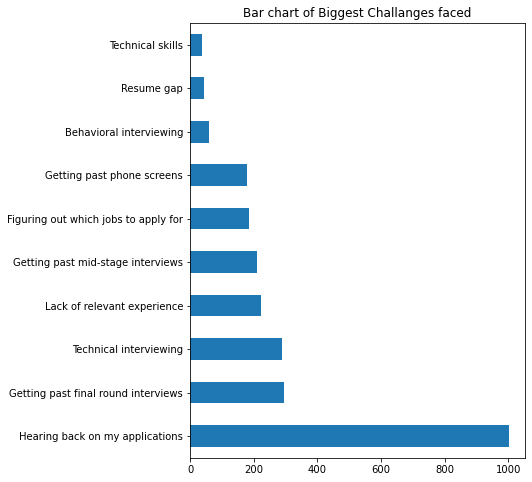

In [1793]:
#Biggest Challenges 
EDA['biggest_challenge_in_search'].value_counts().plot(kind='barh', figsize=(6,8))
plt.title('Bar chart of Biggest Challanges faced')
plt.show()

Haearing back on application is the widely faced challenge by many Candidates

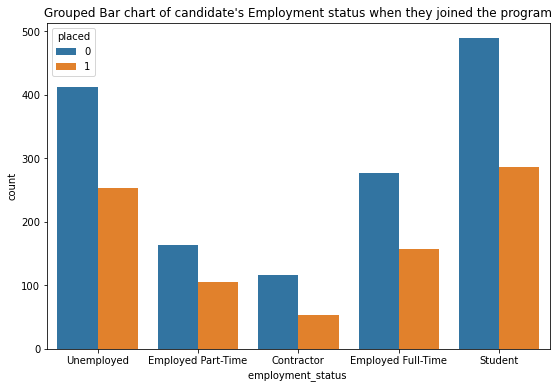

In [1794]:
#Employment status
plt.figure(figsize=(9,6))
sns.countplot(EDA['employment_status '],hue=EDA['placed'])
plt.legend(title='placed',loc='upper left')
plt.title("Grouped Bar chart of candidate's Employment status when they joined the program")
plt.show()

Students and Unemployed candidates tend to get placed more that any other candidates.

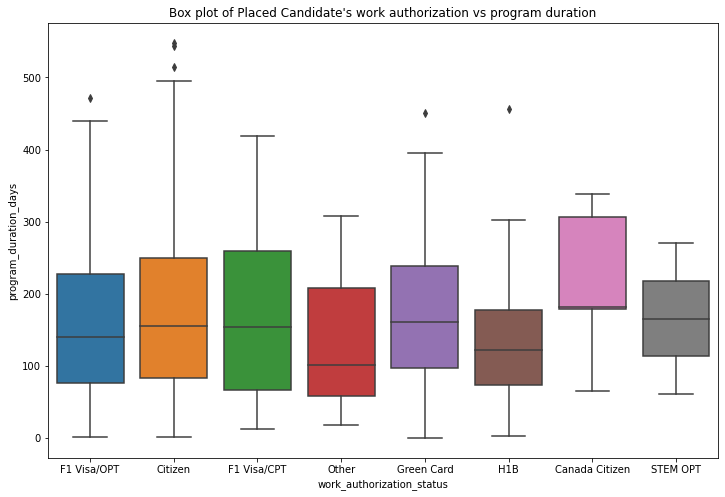

In [1795]:
#Insights of Placed Candidates.
EDA_placed=EDA[EDA['placed']==1]
plt.figure(figsize=(12,8))
sns.boxplot(x='work_authorization_status', y='program_duration_days', data=EDA_placed)
plt.title("Box plot of Placed Candidate's work authorization vs program duration")
plt.show()

H1B work authorization candidates are beneficiaries of Pathrise Program, **75%** of the canditated get placed before 200 days of progam duration

### Numerical

In [1796]:
#New variable Response Rate
#Response Rate = Number of interviews / Number of applications

EDA_1=EDA.loc[(EDA['number_of_applications']>0)&(EDA['program_duration_days']>0),]
EDA_1['Response_rate']=(EDA_1['number_of_interviews']/EDA_1['number_of_applications'])
print("Average Response rate",round(EDA_1['Response_rate'].mean(),2))

Average Response rate 0.22


The Average Response rate from companies of any applicant after joining Pathrise is **22%**. There is a 22% chance that a Candidate will be interviewed after appliying atleast one aplication.

In [1797]:
EDA_1['Response_rate'].describe()

count    1515.000000
mean        0.218834
std         0.570779
min         0.000000
25%         0.000000
50%         0.044444
75%         0.166667
max         7.000000
Name: Response_rate, dtype: float64

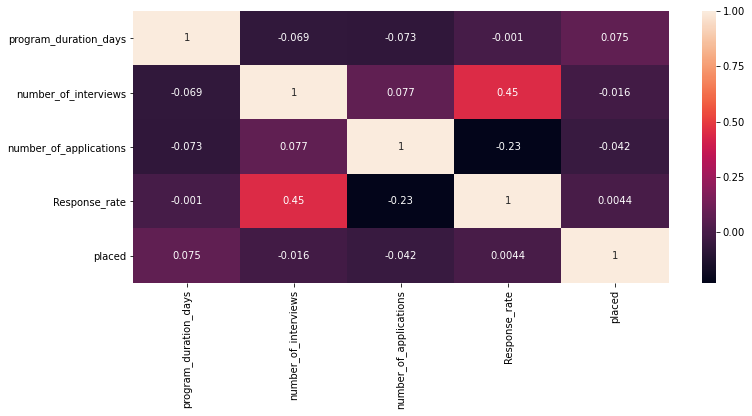

In [1798]:
plt.figure(figsize=(12,5))
sns.heatmap(EDA_1[numerical+['Response_rate','placed']].corr(), annot = True, fmt='.2g')

1.We can observe a positive correlation between Program Duration And Placed meaning that a Candidate will find a jod if he continiues with the program. 

2.We can also notice that there is a positive corelation between number of interviews and number of applications which can be concluded a the more you apply the more interviews you can give.

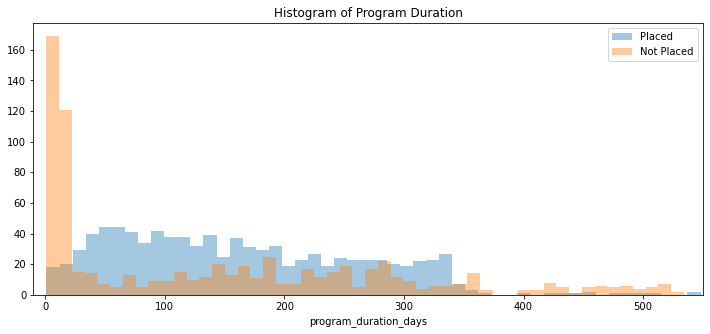

In [1799]:
plt.figure(figsize=(12,5))
sns.distplot(EDA_1[EDA['placed']==1]['program_duration_days'],kde=False,bins=50, label='Placed')
sns.distplot(EDA_1[EDA['placed']==0]['program_duration_days'],kde=False,bins=50,label='Not Placed')
plt.xlim(-10, 550,20)
plt.title("Histogram of Program Duration")
plt.legend(loc='upper right')
plt.show()

1.The Program_duration_days distribution days is highly skewed to the right and we can obseved 2 peaks from 0-20 days where most candidates withdrawl from the program after the 14day trail period. 

2.The Candidates wi have signed up for the program even after the trail period are more likely to get places between 20 - 365 days. 

3.There are presence of many outliers. some candidated were not placed even after 500 days and some did aftr 550 days.

Text(0.5, 1.0, 'Scatter plot of number_of_interviews vs number_of_applcatios with trend line')

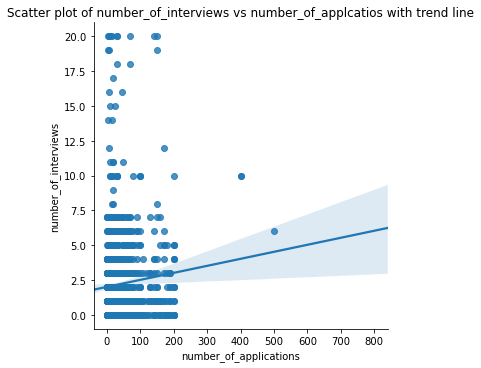

In [1800]:
sns.lmplot(x="number_of_applications", y="number_of_interviews",
               height=5, data=EDA_1)
plt.title("Scatter plot of number_of_interviews vs number_of_applcatios with trend line")

Text(0.5, 1.0, 'Scatter plot of number_of_interviews vs  with trend line')

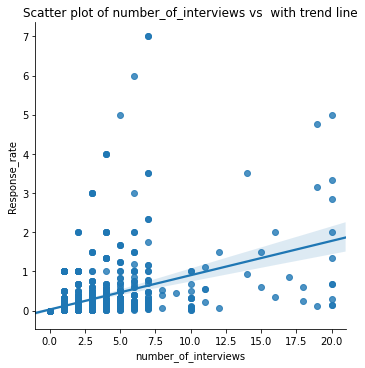

In [1801]:
sns.lmplot(y="Response_rate", x="number_of_interviews",
               height=5, data=EDA_1)
plt.title("Scatter plot of number_of_interviews vs  with trend line")

## Modeling use cases
The Data set can be used for developing two-usecases
1.  To predict the number of days a current Candidate would participate in the program. `program_duration_days` is the target variable for the first use case.
2.  To predict weather current Candidate will be placed or not. `placed` is Target variable for second usecase.


In [1802]:
#Data Pre-processing
data_model=data.copy()
data_model.drop('cohort_tag',inplace=True,axis=1) #Removing Cohort Tag

In [1803]:
#Categorical Missing Vale Imputation
data_model.update(data_model[['employment_status ',
           'highest_level_of_education',
           'biggest_challenge_in_search',
           'professional_experience',
           'work_authorization_status',
           'gender','length_of_job_search',
           'race']].fillna('Missing'))
#Numerica; Missing Vale Imputation
data_model.update(data['number_of_interviews'].fillna(data['number_of_interviews'].median()))

### USECASE 1

In [1804]:
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import xgboost 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from xgboost import plot_importance
import statsmodels.api as sm

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [1805]:
numerical=['program_duration_days','number_of_interviews','number_of_applications']
categorical=[i for i in  data_model.columns if i not in numerical]
X=pd.get_dummies(data_model[categorical]) #Creating Dummy Variables
X[numerical]=data_model[numerical]

In [1806]:
print("Number of rows after Data Prepration:",X.shape[0])
print("Number of columns Data Prepration:",X.shape[1])

Number of rows after Data Prepration: 2544
Number of columns Data Prepration: 80


In [1807]:
#Seperating the Current Candidates for impleimplementing Usecases
model_data=X.loc[data_model['program_duration_days'].isnull()!=True,]
current_candidates=X.loc[data_model['program_duration_days'].isnull()==True,]

#Data for Usecase1
ytrain_uc1=model_data.loc[:,'program_duration_days']
Xtrain_uc1=model_data.drop(['placed','pathrise_status_Placed','program_duration_days'],axis=1)

ycurrent_candidates_uc1=current_candidates.loc[:,'program_duration_days']
Xcurrent_candidates_uc1=current_candidates.drop(['placed','pathrise_status_Placed','program_duration_days'],axis=1)

In [1808]:
#Sploting the Data
X_train, X_test, y_train, y_test= train_test_split(Xtrain_uc1,ytrain_uc1,test_size=0.2,random_state =2)

In [1809]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
print("r2: %f" % round(r2_score(y_test,y_pred),3))
print("Error percentage",round(100*rmse/y_test.mean(),3))

RMSE: 87.408253
r2: 0.513000
Error percentage 66.836


In [1810]:
#RandomForest
rf = RandomForestRegressor(random_state=8)
param = {'n_estimators': [10, 150, 300],
        'max_depth': [5,7,10],
        'max_features': [10, 30, 70]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
gs_fit = gs.fit(X_train, y_train)

In [1811]:
preds = gs_fit.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("r2: %f" % round(r2_score(y_test,y_pred),2))
print("Error percentage",round(100*rmse/y_test.mean(),2))

RMSE: 86.880816
r2: 0.510000
Error percentage 66.43


In [1812]:
#Best Estimator XGBOOST
model = xgboost.XGBRegressor(objective ='reg:linear',
                            colsample_bytree=0.39,               
                             learning_rate=0.01,
                             alpha=0.4,
                             max_depth=2,
                             min_child_weight=1.5,
                             n_estimators=800,                                                                    
                             reg_lambda=0.42,
                             subsample=0.8,
                             seed=23) 
model.fit(X_train,y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("r2: %f" % round(r2_score(y_test,y_pred),3))
print("Error percentage",round(100*rmse/y_test.mean(),3))

[14:30:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 86.987215
r2: 0.513000
Error percentage 66.514


Initialy I have implemented a OLS model to mind the data and to identify the atributes that are important in predicting the program duration days usinf data mining techniques such as backward selection and appropriate tests. Since there was a raise in error and  RMSE, drop in Rsquare. I have used all the attributs to build a regression model. 

From the above scores, we can say that RandomForest did a better job compared to Linear regression and Xgboost in terms RMSE, R2 and Error percentage. This would be the final model for prediction.

In [1813]:
#Usecase1 implementation
yscoring_uc1=gs_fit.predict(Xscoring_uc1)

## Usecase 2

In [1814]:

from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_colwidth', 100)


In [1815]:
def model_performance(model,x,y):
    pred=model.predict(x)
    print("Model Performance")
    print("--------------------------")
    print ("Accuracy:",accuracy_score(y,pred))
    print ("precision:", precision_score(y,pred))
    print ("Recall:",recall_score(y,pred))
    print ("F1 Score:",f1_score(y,pred))
def model_performance_scores(model,x,y):
    pred=model.predict(x)
    return accuracy_score(y,pred), precision_score(y,pred),recall_score(y,pred),f1_score(y,pred)
def display_AUC_ROC():
    print('Area Under ROC')
    print('---------------')
    print('LogisticRegression:',roc_auc_score(y_train, y_logitint_scores).round(3))
    print('DecisionTree:',roc_auc_score(y_train, y_dt_scores).round(3))
    print('RandomForest:',roc_auc_score(y_train, y_rf_scores).round(3))
    print('XGBoost:',roc_auc_score(y_train, y_xgb_scores).round(3))
    plt.figure(figsize=(8,6))
    plt.plot(fpr_logit,tpr_logit,label="Logistic regression")
    plt.plot(fpr_dt,tpr_dt,label="Decisiontree")
    plt.plot(fpr_rf,tpr_rf,label="Random Forest")
    plt.plot(fpr_xgb,tpr_xgb,label="Gradient Boosting")
    plt.plot([0, 1], [0, 1], 'k--'),plt.axis([0, 1, 0, 1.1])
    plt.xlabel('False Positive Rate') ,plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right'),plt.title('Recieve operator curve')

In [1816]:

ytrain_uc2=model_data.loc[:,'placed']
Xtrain_uc2=model_data.drop(['placed','pathrise_status_Placed','program_duration_days'],axis=1)

X_train, X_test, y_train, y_test= train_test_split(Xtrain_uc2,ytrain_uc2,test_size=0.3,random_state =1)

log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)
print('TRAINING DATA')
model_performance(log_reg,X_train,y_train)

print('\nTESTING DATA')
model_performance(log_reg,X_test,y_test)

TRAINING DATA
Model Performance
--------------------------
Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1 Score: 1.0

TESTING DATA
Model Performance
--------------------------
Accuracy: 1.0
precision: 1.0
Recall: 1.0
F1 Score: 1.0


STRANGE!!!!! isn't it? Infact it's clearly Overfitting both train and test data by identifying the patterns from the Pathrise_status dummy variables. Which can be verified from the Decesion tree plot and correlation matrix below

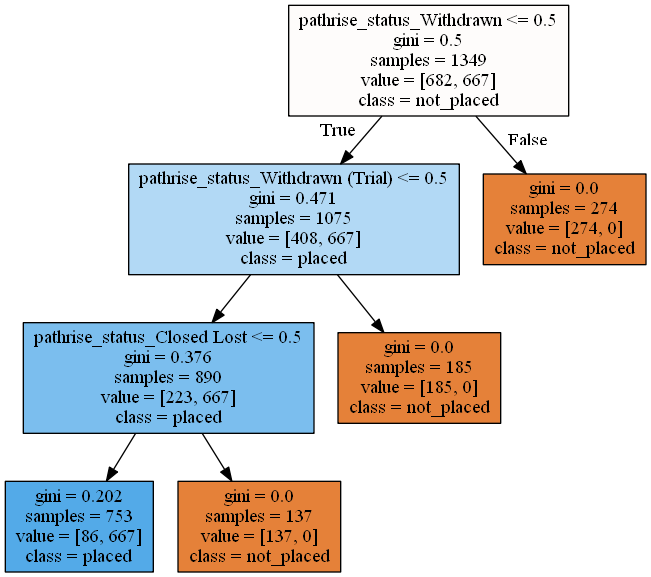

In [1817]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3) #remove vcriterion for gini
tree_clf.fit(X_train, y_train)
pred=tree_clf.predict(X_train)
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()  
export_graphviz(tree_clf, out_file=dot_data,feature_names=X_train.columns,class_names=['not_placed','placed'],filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [1818]:
corr=model_data.corr()
corr[:20]

,placed,pathrise_status_Active,pathrise_status_Break,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_MIA,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),...,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Missing,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,program_duration_days,number_of_interviews,number_of_applications
placed,1.000000,NaN,NaN,-0.320191,-0.132876,NaN,1.000000,-0.505815,-0.209020,-0.405364,...,-0.034513,0.033400,-0.005654,0.039806,0.034655,0.049617,-0.020909,0.197222,-0.012853,-0.040361
pathrise_status_Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathrise_status_Break,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathrise_status_Closed Lost,-0.320191,NaN,NaN,1.000000,-0.043258,NaN,-0.320191,-0.164668,-0.068046,-0.131966,...,-0.001721,-0.009951,-0.026601,-0.012746,0.016931,-0.024270,0.024821,-0.349214,0.010258,0.036656
pathrise_status_Deferred,-0.132876,NaN,NaN,-0.043258,1.000000,NaN,-0.132876,-0.068335,-0.028238,-0.054764,...,-0.034364,-0.022307,-0.011039,-0.005289,-0.002887,-0.013429,-0.004255,-0.144920,0.009314,-0.032839
pathrise_status_MIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathrise_status_Placed,1.000000,NaN,NaN,-0.320191,-0.132876,NaN,1.000000,-0.505815,-0.209020,-0.405364,...,-0.034513,0.033400,-0.005654,0.039806,0.034655,0.049617,-0.020909,0.197222,-0.012853,-0.040361
pathrise_status_Withdrawn,-0.505815,NaN,NaN,-0.164668,-0.068335,NaN,-0.505815,1.000000,-0.107495,-0.208471,...,-0.003011,-0.021631,0.051931,-0.020135,-0.007685,-0.011491,-0.007207,0.190060,0.001174,0.014909
pathrise_status_Withdrawn (Failed),-0.209020,NaN,NaN,-0.068046,-0.028238,NaN,-0.209020,-0.107495,1.000000,-0.086147,...,0.010027,0.012508,-0.017365,-0.008320,-0.022583,0.000853,0.029371,0.440319,-0.020711,-0.029653
pathrise_status_Withdrawn (Trial),-0.405364,NaN,NaN,-0.131966,-0.054764,NaN,-0.405364,-0.208471,-0.086147,1.000000,...,0.061323,-0.013201,-0.015581,-0.016136,-0.040629,-0.032736,0.002132,-0.408904,0.016862,0.039215


Removing pathrise_status to produce an unbiased estimate

In [1819]:
#Data PReperation

#Removing 
categorical.remove('pathrise_status')
X=pd.get_dummies(data_model[categorical])
X[numerical]=data_model[numerical]
model_data=X.loc[data_model['program_duration_days'].isnull()!=True,]
current_candidates=X.loc[data_model['program_duration_days'].isnull()==True,]

ytrain_uc2=model_data.loc[:,'placed']
Xtrain_uc2=model_data.drop(['placed','program_duration_days'],axis=1)
yscoring_uc2=current_candidates.loc[:,'placed']
Xscoring_uc2=current_candidates.drop(['placed','program_duration_days'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(Xtrain_uc2,ytrain_uc2,test_size=0.3,random_state =1)


In [1820]:
#logistic Regression
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)
logistic_train_scores=list(model_performance_scores(log_reg,X_train,y_train))
logistic_test_scores=list(model_performance_scores(log_reg,X_test,y_test))
y_logitint_predict_prob=log_reg.predict_proba(X_train)
y_logitint_scores=y_logitint_predict_prob[:,1]
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_train, y_logitint_scores)


#Decesion Tree
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
dt_train_scores=list(model_performance_scores(dt,X_train,y_train))
dt_test_scores=list(model_performance_scores(dt,X_test,y_test))
y_dt_predict_prob=dt.predict_proba(X_train)
y_dt_scores=y_dt_predict_prob[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_dt_scores)


#Random Forest
rf = RandomForestClassifier(max_depth=3,n_estimators=500,random_state=4)
rf.fit(X_train,y_train)
rf_test_scores=list(model_performance_scores(rf,X_test,y_test))
y_random_predict_prob=rf.predict_proba(X_train)
y_rf_scores=y_random_predict_prob[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_rf_scores)

#XGboost
XGB_model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=10000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=10
                    )
XGB_model.fit(X_train,y_train)
xgb_train_scores=list(model_performance_scores(XGB_model,X_train,y_train))
xgb_test_scores=list(model_performance_scores(XGB_model,X_test,y_test))
y_xgb_predict_prob=XGB_model.predict_proba(X_train)
y_xgb_scores=y_xgb_predict_prob[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_xgb_scores)

In [1821]:
scores=pd.DataFrame([logistic_test_scores,
                   dt_test_scores,rf_test_scores,
                    xgb_test_scores])
scores.columns=['Accuracy','Precision','Recall','F1 Score']
scores.index=['logistic_test',
              'DecisionTree_test',
              'RandomForest_test',
               'XGB_Test']
scores

,Accuracy,Precision,Recall,F1 Score
logistic_test,0.588946,0.576577,0.664360,0.617363
DecisionTree_test,0.568221,0.551724,0.719723,0.624625
RandomForest_test,0.595855,0.593857,0.602076,0.597938
XGB_Test,0.583765,0.585714,0.567474,0.576450


From the Ecaluation matrix, it is noticiable that random forest has the higest accuracy but less recall compared to Decision tree and better precision compared to Decision tree. There is always a trade-off between Precision and Recall. To have a  balance between the both we consider F1_score the harmonic mean of precision and recall. 

when it comes to F1score, Decision tree has 0.623 f1_score ar 72% recall and 55.1% precision. But we can also look at ROC coverve before decising our dinal model


Area Under ROC
---------------
LogisticRegression: 0.659
DecisionTree: 0.621
RandomForest: 0.69
XGBoost: 0.646


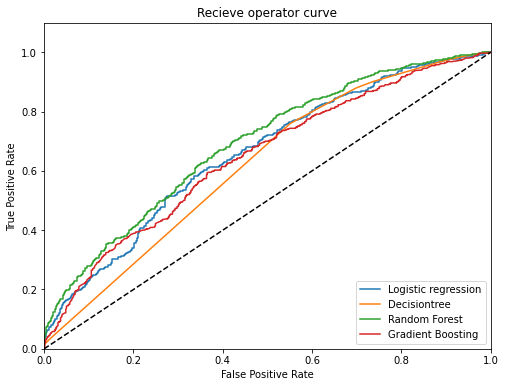

In [1822]:
display_AUC_ROC()

Consideing the problem statement, the main objective is to reduce the false positive rate because if a candidate is predicted PLACED while he's not will lead to uncertinities and false positives are considered costly in this situation. Random Forest did a better classification has higher True positives compared to other models and would be the final model.

In [1823]:
#Usecase1 implementation
yscoring_uc2=rf.predict(Xscoring_uc2)

In [1824]:
#Placement starus of new 
yscoring_uc2

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

**Colclusion:** The usecases can be used in business and training perspective of candidates. In the future I would like to exted this Usecases implementation by dedicating more time for analyzing attributes in-depth and Improve the Model's performance leading to better business insights. 